In [20]:
%matplotlib notebook
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
import csv
import math

In [21]:

df = pd.read_csv('../cerroNegro_regGrid_constNE_SOURCE.txt',sep=" ", header=0)


df = df.dropna(axis=1, how='all')
df = df.fillna(0)
df = df.rename(columns={'#Easting': 'Easting'})
display(df)

,Easting,Northing,Elev.,Mass/Area,[-4->-3),[-3->-2),[-2->-1),[-1->0),[0->1),[1->2),[2->3),[3->4)
0,482290,1332690,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,482290,1334190,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
2,482290,1335690,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,482290,1337190,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
4,482290,1338690,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
5,482290,1340190,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
6,482290,1341690,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
7,482290,1343190,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
8,482290,1344690,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
9,482290,1346190,350,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [22]:
phis = [
    '[-4->-3)',
    '[-3->-2)',
    '[-2->-1)',
    '[-1->0)',
    '[0->1)',
    '[1->2)',
    '[2->3)',
    '[3->4)',
]

xx = df['Easting'].values
yy = df['Northing'].values
ma = df['Mass/Area'].values


phi_z = []
phi_mass = []
for i, p in enumerate(phis):
    phi_z.append(df[p].values)
    phi_z[i] = phi_z[i]
    phi_z[i] = phi_z[i] + 0.000000000000000000001
    
    phi_mass.append(df[p].values)
    phi_mass[i] = phi_mass[i]*ma
    phi_mass[i] = phi_mass[i] + 0.000000000000000000001

x_0, y_0 = 532290, 1382690


[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


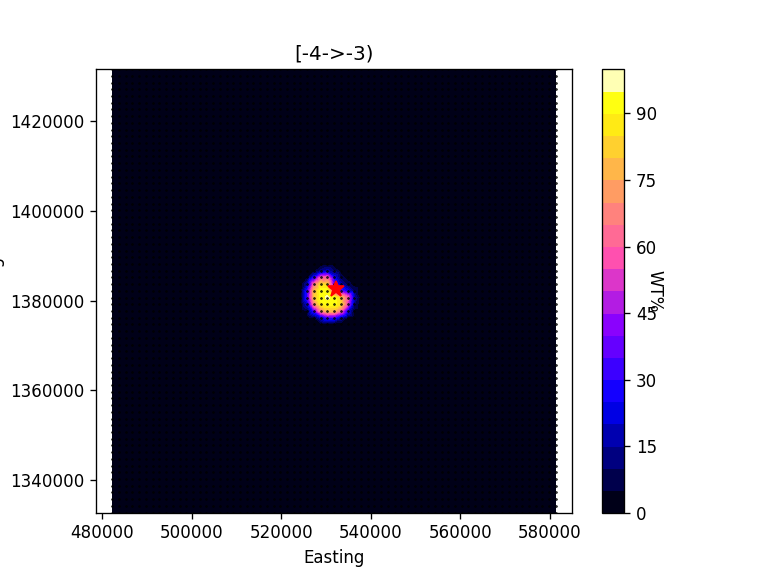

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


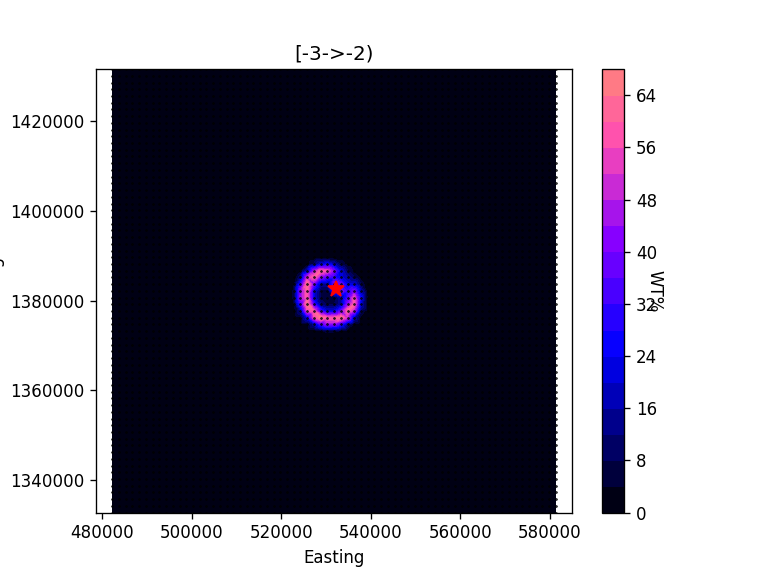

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


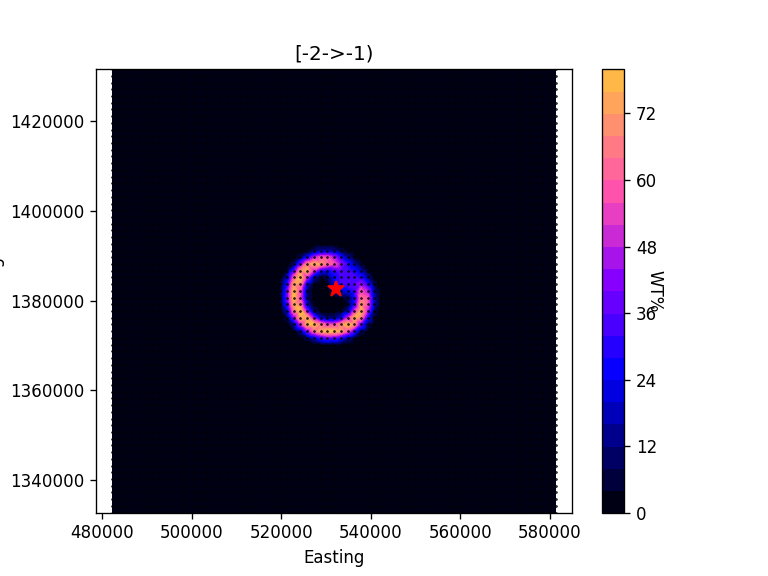

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


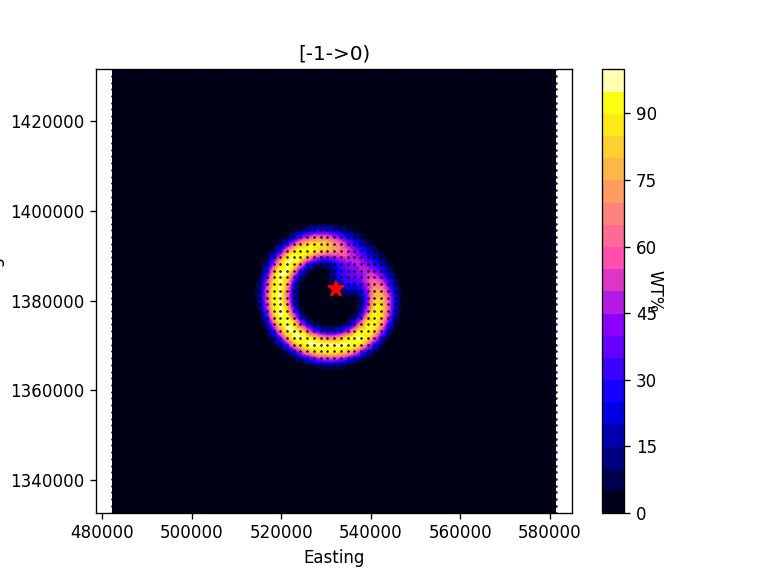

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


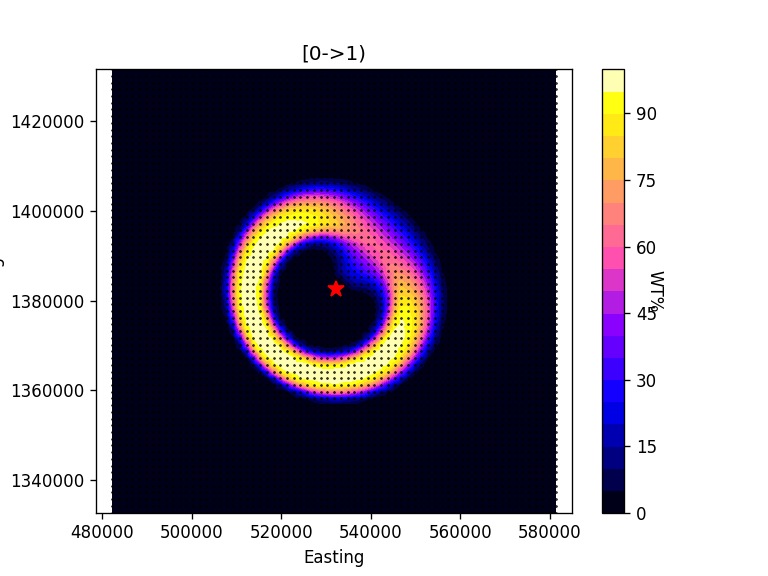

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   1.00000000e-21
   1.00000000e-21   1.00000000e-21]


<IPython.core.display.Javascript object>


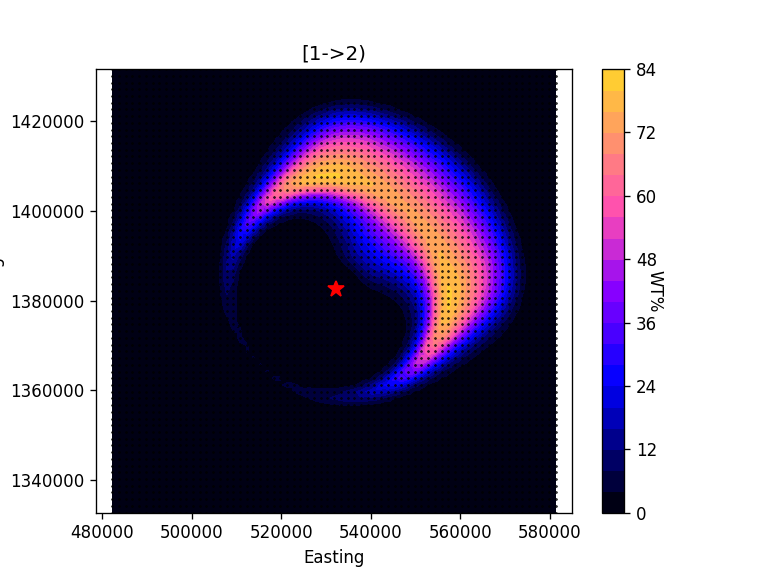

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   2.50000000e+01
   1.80000000e+01   1.10000000e+01]


<IPython.core.display.Javascript object>


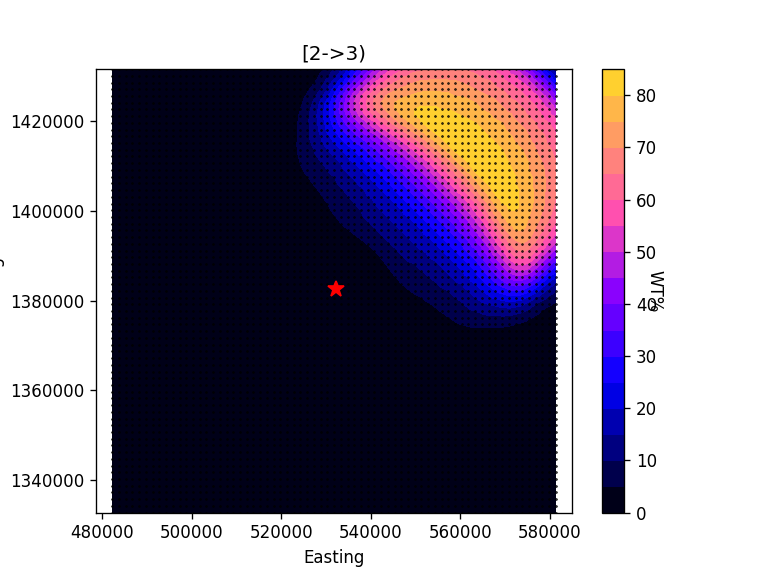

[  1.00000000e-21   1.00000000e-21   1.00000000e-21 ...,   7.50000000e+01
   8.20000000e+01   8.90000000e+01]


<IPython.core.display.Javascript object>


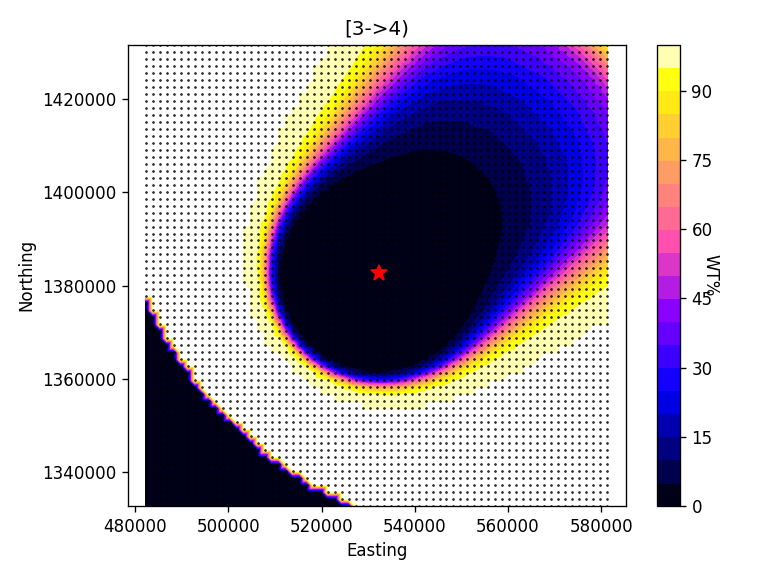

In [27]:
for i, phi in enumerate(phi_z):
    print(phi)
    plt.figure()
    plt.ylabel("Northing")
    plt.xlabel("Easting")
    plt.title(phis[i])
    contour = plt.tricontourf(xx, yy, phi, 20, cmap='gnuplot2');
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('WT%', rotation=270)
    plt.clim(phi.min(), 100)
    plt.axis('equal')
    plt.plot(xx, yy, 'ko', ms=0.5)
    plt.plot(x_0, y_0, 'r*', ms=10)
    plt.savefig('./cerroNegro_regGrid_constNE_SOURCE_'+str(phis[i])+'.png')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


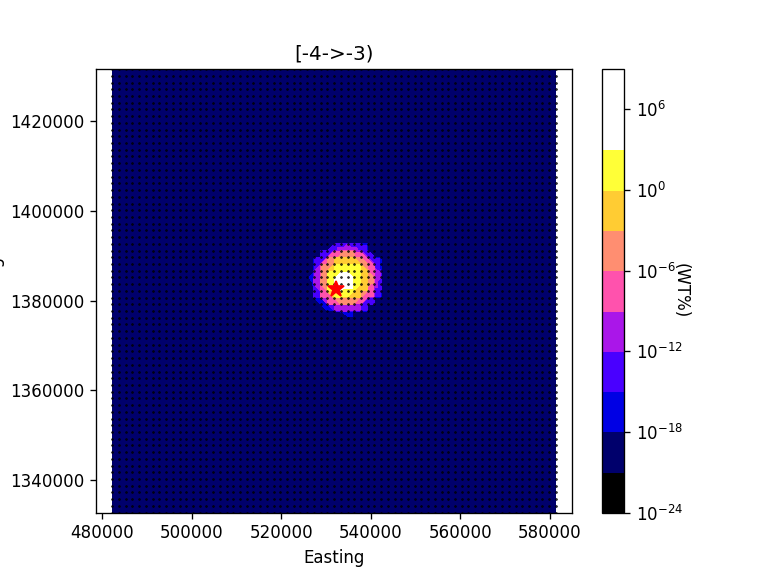

<IPython.core.display.Javascript object>


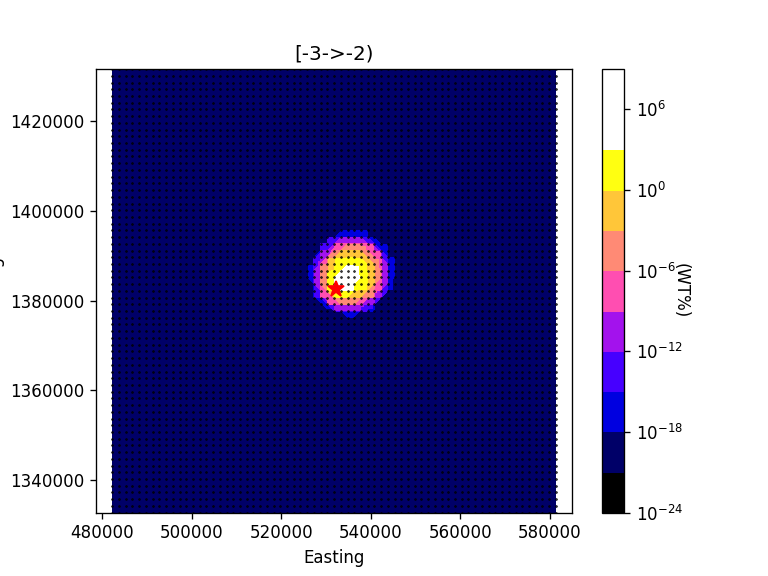

<IPython.core.display.Javascript object>


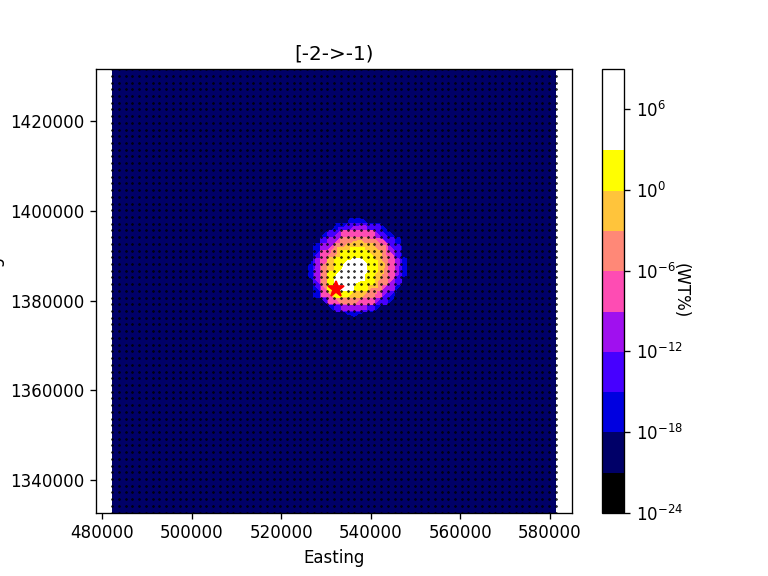

<IPython.core.display.Javascript object>


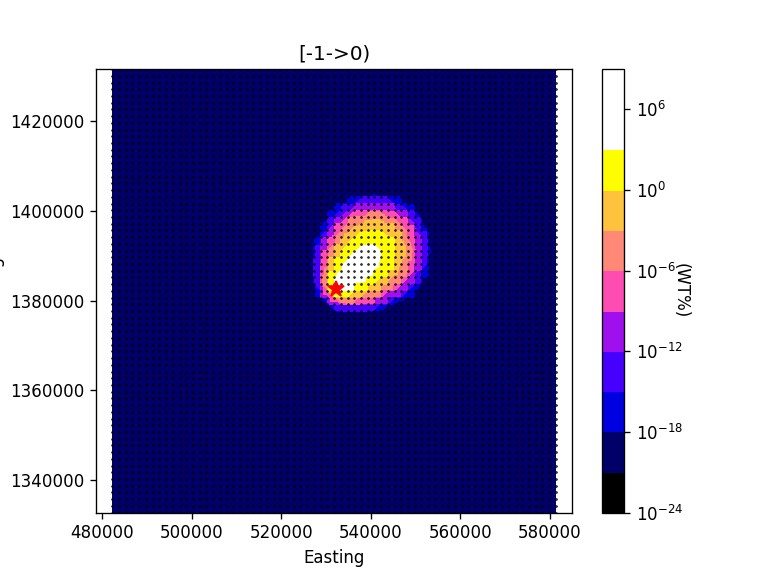

<IPython.core.display.Javascript object>


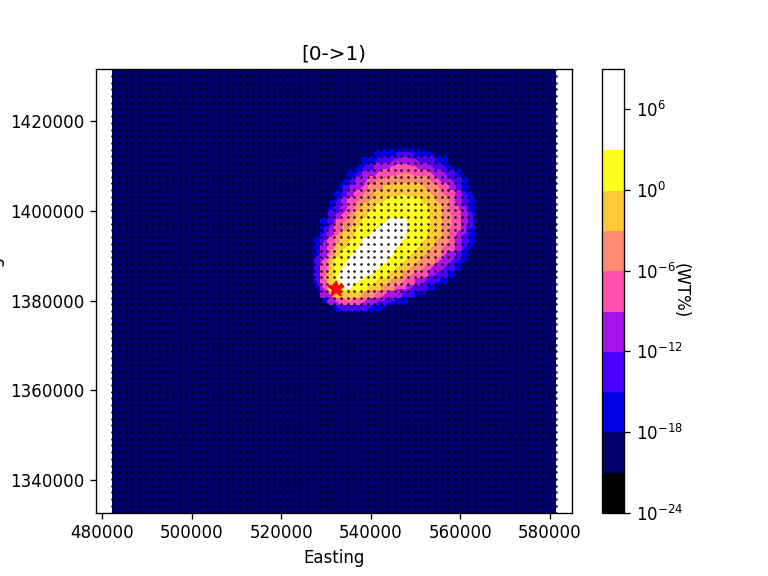

<IPython.core.display.Javascript object>


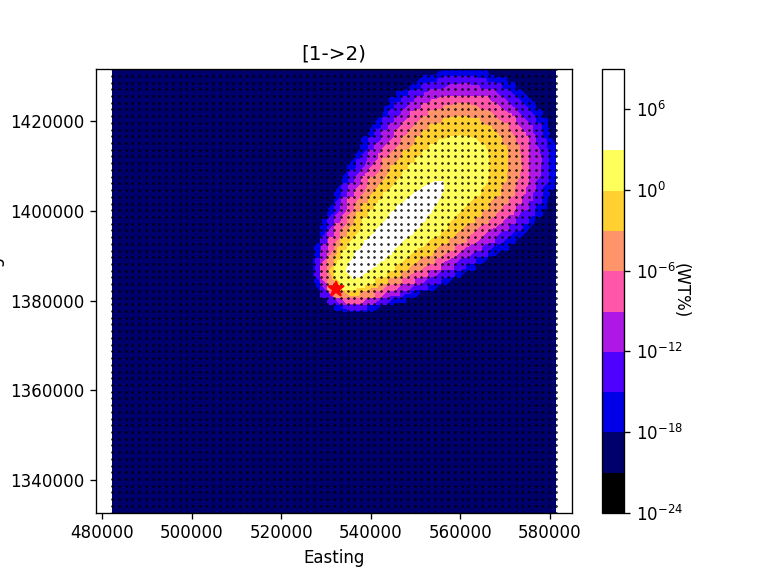

<IPython.core.display.Javascript object>


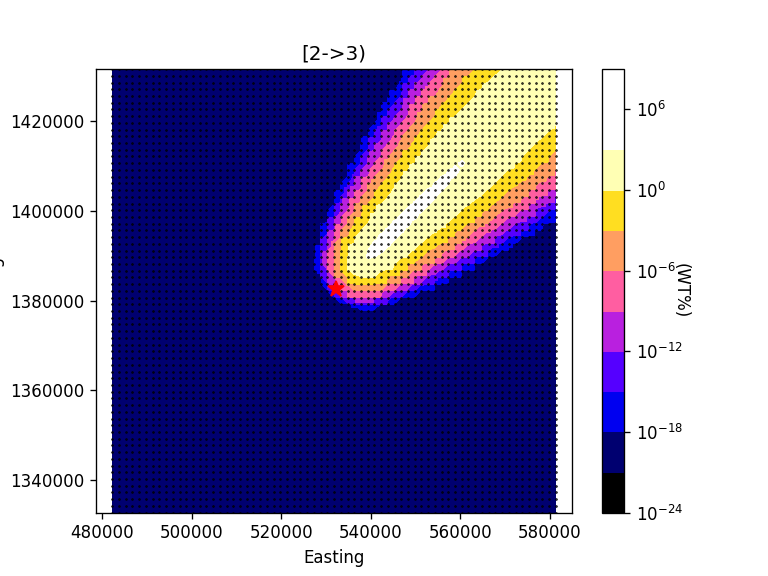

<IPython.core.display.Javascript object>


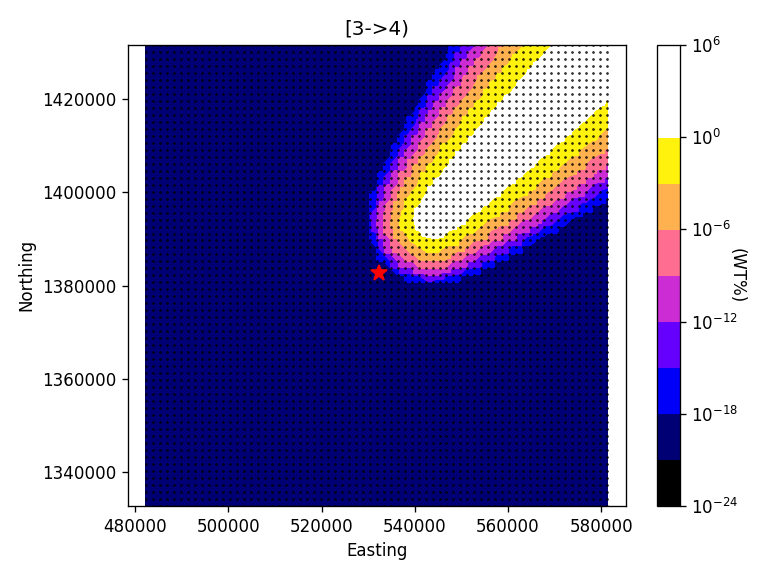

In [28]:
for i, phi in enumerate(phi_mass):
    plt.figure()
    plt.ylabel("Northing")
    plt.xlabel("Easting")
    plt.title(phis[i])
    contour = plt.tricontourf(xx, yy, phi, cmap='gnuplot2',norm=LogNorm(vmin=phi.min(), vmax=phi.max()));
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('(WT%)', rotation=270)
    plt.axis('equal')
    plt.plot(xx, yy, 'ko', ms=0.5)
    plt.plot(x_0, y_0, 'r*', ms=10)
    plt.savefig('./cerroNegro_regGrid_constNE_SOURCE_mass'+str(phis[i])+'.png')

plt.tight_layout()
plt.show()